In [1]:
import os
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib tk

from vrlatency.analysis import read_csv, read_params, transform_display_df, shift_by_sse, plot_display_figures

## Get the data from server

---

## Import Data

In [2]:
path_data = "../../data/"
path_fig = "../../Figures/display/"

os.chdir(path_data)

In [3]:
df_data_all = pd.DataFrame()
df_params_all = pd.DataFrame()

for filename in tqdm(glob.glob('*.csv')):
    name = filename.split('.')[0]
    
    df_data = read_csv(filename)
    df_data['Session'] = name
    params = read_params(filename)
    params_series = pd.Series(params)
    params_series.name = name
    
    df_data_all = df_data_all.append(df_data)
    df_params_all = df_params_all.append(params_series)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:11<00:00,  2.43it/s]


In [4]:
df_data_all.head()

,Trial,Time,SensorBrightness,Session
0,2,813068,0,display_20180830_115317
1,2,813340,0,display_20180830_115317
2,2,813612,0,display_20180830_115317
3,2,813884,0,display_20180830_115317
4,2,814156,0,display_20180830_115317


---

## Single monitor analysis

### Choose a file and display it

In [5]:
session = 16
filename = df_params_all.index[16] + '.csv'
filename

'display_20180830_181639.csv'

In [6]:
df = read_csv(filename)
df.head()

,Trial,Time,SensorBrightness
0,2,1578364,5
1,2,1578636,5
2,2,1578908,5
3,2,1579180,5
4,2,1579452,4


In [7]:
thresh = .8
session_name = filename.split('.')[0]
df_transformed = transform_display_df(df, session=session_name, thresh=thresh)
df_transformed.head()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc
0,display_20180830_181639,2,0,1578.364,0.000,5,25.416,-25.416,0.8
1,display_20180830_181639,2,1,1578.636,0.272,5,25.416,-25.144,0.8
2,display_20180830_181639,2,2,1578.908,0.544,5,25.416,-24.872,0.8
3,display_20180830_181639,2,3,1579.180,0.816,5,25.416,-24.600,0.8
4,display_20180830_181639,2,4,1579.452,1.088,4,25.416,-24.328,0.8


In [8]:
df_shifted = shift_by_sse(df_transformed.copy())
df_shifted.head()

,Session,Trial,Sample,Time,TrialTime,SensorBrightness,DisplayLatency,TrialTransitionTime,ThreshPerc
0,display_20180830_181639,2,0,1578.364,0.000,5,25.416,-26.776,0.8
1,display_20180830_181639,2,1,1578.636,0.272,5,25.416,-26.504,0.8
2,display_20180830_181639,2,2,1578.908,0.544,5,25.416,-26.232,0.8
3,display_20180830_181639,2,3,1579.180,0.816,5,25.416,-25.960,0.8
4,display_20180830_181639,2,4,1579.452,1.088,4,25.416,-25.688,0.8


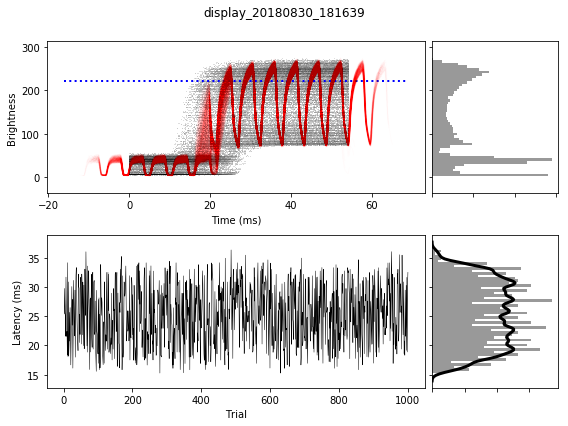

In [9]:
plot_display_figures(df_shifted)
plt.show()

---

## Comparing multiple screens

In [10]:
df_params_all.head()

,Date,Depth,Experiment,Height,Monitors,Rate,Time,Trials,Width
display_20180830_115317,30.08.2018,32,DisplayExperiment,1080,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,60,11:51:10,1000,1920
display_20180830_123133,30.08.2018,32,DisplayExperiment,1080,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,120,12:29:25,1000,1920
display_20180830_123445,30.08.2018,32,DisplayExperiment,1024,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,60,12:32:37,1000,1280
display_20180830_124007,30.08.2018,32,DisplayExperiment,720,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,60,12:37:59,1000,1280
display_20180830_124242,30.08.2018,32,DisplayExperiment,768,SAM_SycMastr_H9XS904970 | VX_ROCtr_16843009,60,12:40:34,1000,1024


In [11]:
import vrlatency as vrl

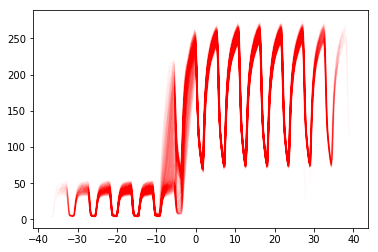

In [12]:
mean_latency = df_shifted.DisplayLatency.mean().mean()
vrl.analysis.plot_shifted_brightness_over_session(time=df_shifted.TrialTransitionTime, sensor_brightness=df_shifted.SensorBrightness, shift_by=0, trial_idx=df_shifted.Trial)

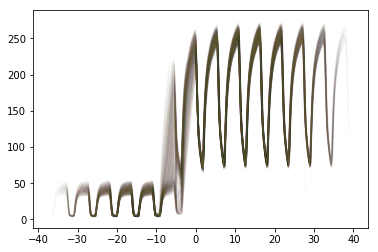

In [14]:
time = df_shifted.TrialTransitionTime
sensor_brightness = df_shifted.SensorBrightness
shift_by = 0
trial_idx = df_shifted.Trial

for trial in trial_idx.unique():
    plt.plot(time[trial_idx == trial] + shift_by, sensor_brightness[trial_idx == trial], linewidth=1, alpha=.01)

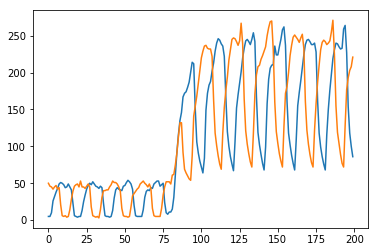

In [17]:
trial1= 3
trial2 = 30
plt.plot(sensor_brightness[trial_idx == trial1].values)
plt.plot(sensor_brightness[trial_idx == trial2].values)

---

1. find the maximum first timepoint among the trials
2. find the minimum last timepoint among the trials
3. crop all the trials with those two limits (do a query)
4. index the whole session dataframe sample again (basically remove the samples and assign samples again)
5. grouby sample and take the average for brightness
6. groupby sample and take the average for time
7. plot it!

In [52]:
dd = df_shifted.copy()

# find the maximum first timepoint
lower = dd.groupby('Trial').TrialTransitionTime.apply(min).max()

# find the minimum last timepoint
upper = dd.groupby('Trial').TrialTransitionTime.apply(max).min()

# crop all of the by this time limit
query = '({} < TrialTransitionTime) & (TrialTransitionTime < {})'.format(lower, upper)
dc = dd.query(query)

# Resample
dc['Sample'] = dc.groupby('Trial').Sample.apply(lambda x: x - x.min())

# groupby sample and take the average time and average brightness
avg_brightness = dc.groupby('Sample').SensorBrightness.apply(np.mean)
avg_trialtranstiontime = dc.groupby('Sample').TrialTransitionTime.apply(np.mean)

c:\users\mohammad bashiri\anaconda3\envs\vrlatency3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


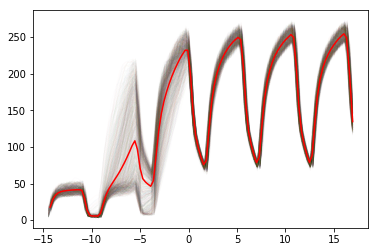

In [54]:
time = dc.TrialTransitionTime
sensor_brightness = dc.SensorBrightness
shift_by = 0
trial_idx = dc.Trial

for trial in trial_idx.unique():
    plt.plot(time[trial_idx == trial] + shift_by, sensor_brightness[trial_idx == trial], linewidth=1, alpha=.01)
    
plt.plot(avg_trialtranstiontime, avg_brightness, 'r')

In [78]:
def get_average_time_and_brightness(df):
    """Returns an average signal representing the time and the brightness value"""
    dd = df.copy()
    lower = dd.groupby('Trial').TrialTransitionTime.apply(min).max()
    upper = dd.groupby('Trial').TrialTransitionTime.apply(max).min()
    query = '({} < TrialTransitionTime) & (TrialTransitionTime < {})'.format(lower, upper)
    dd.query(query, inplace=True)
    dd['Sample'] = dd.groupby('Trial').Sample.apply(lambda x: x - x.min())
    avg_brightness = dd.groupby('Sample').SensorBrightness.apply(np.mean)
    avg_trialtranstiontime = dd.groupby('Sample').TrialTransitionTime.apply(np.mean)
    
    return avg_trialtranstiontime.values, avg_brightness.values

In [79]:
tt, bb = get_average_time_and_brightness(df_shifted)

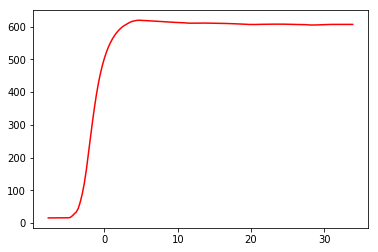

In [80]:
plt.plot(tt, bb, 'r')

---

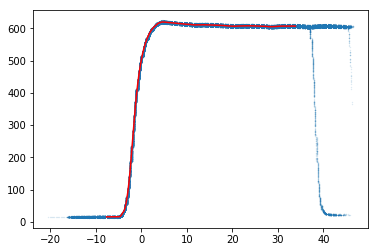

In [74]:
session = 27
filename = df_params_all.index[session] + '.csv'
df = read_csv(filename)

thresh = .8
session_name = df_params_all.index[session]
df_transformed = transform_display_df(df, session=session_name, thresh=thresh)

df_shifted = shift_by_sse(df_transformed.copy())

plt.scatter(df_shifted.TrialTransitionTime, df_shifted.SensorBrightness, s=.1, alpha=.2)
tt, bb = get_average_time_and_brightness(df_shifted)
plt.plot(tt, bb, 'r')

working on session 16
working on session 19
working on session 25
working on session 27


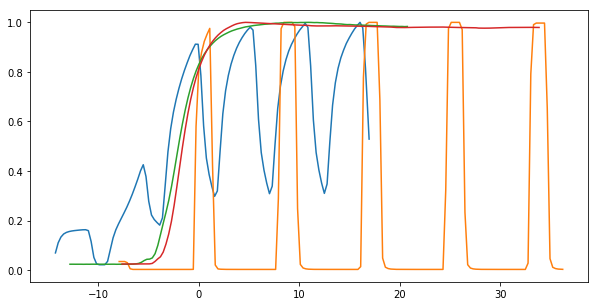

In [88]:
fig, ax = plt.subplots(figsize=(10,5))

for session in [16, 19, 25, 27]:
    
    print('working on session {}'.format(session))
    
    filename = df_params_all.index[session] + '.csv'
    df = read_csv(filename)

    thresh = .8
    session_name = df_params_all.index[session]
    df_transformed = transform_display_df(df, session=session_name, thresh=thresh)

    df_shifted = shift_by_sse(df_transformed.copy())

    tt, bb = get_average_time_and_brightness(df_shifted)
    bb = bb / bb.max()
    ax.plot(tt, bb, label=session_name)
    
# plt.legend()